In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Primary and secondary grassland, woodland and crop fires by month and financial year

In [3]:
# upload and read csv

# File: Primary and secondary grassland, woodland and crop fires by month and financial year
# Fires ATTENDED by the Fire and Rescue Services (FRS) 

df = pd.read_csv("/Users/c23093869/Desktop/Data/CSAF0054 copy.csv", encoding = 'ISO-8859-1', low_memory=False)

In [4]:
#print(df)

In [5]:
df.shape

(115776, 42)

In [6]:
# Select columns

df2 = df[['Data_DEC', 'Area_ItemName_ENG_STR', 'Count_ItemName_ENG_STR', 'Year_Code_STR', 'Location_ItemName_ENG_STR', 'Month_ItemName_ENG_STR', 'Motive_ItemName_ENG_STR']]

In [7]:
df2.head()

,Data_DEC,Area_ItemName_ENG_STR,Count_ItemName_ENG_STR,Year_Code_STR,Location_ItemName_ENG_STR,Month_ItemName_ENG_STR,Motive_ItemName_ENG_STR
0,0,Mid and West Wales,Primary fires,2009-10,Private/Domestic garden/allotment,January,Accidental
1,0,Mid and West Wales,Primary fires,2009-10,Private/Domestic garden/allotment,January,Deliberate
2,0,Mid and West Wales,Primary fires,2009-10,Private/Domestic garden/allotment,January,All motives
3,0,Mid and West Wales,Primary fires,2009-10,Private/Domestic garden/allotment,February,Accidental
4,0,Mid and West Wales,Primary fires,2009-10,Private/Domestic garden/allotment,February,Deliberate


In [8]:
# Select grassland, woodland and crop fires only

df3 = df2[df2.Location_ItemName_ENG_STR == "All grassland, woodland and crop fires"]

In [9]:
# rename columns
df3.columns = ['number', 'area', 'fire_type', 'year', 'location', 'month', 'motive']

In [10]:
# remove annual total from the table
df4 = df3[df3['month'] != 'Annual total']
df4

,number,area,fire_type,year,location,month,motive
1677,0,Mid and West Wales,Primary fires,2009-10,"All grassland, woodland and crop fires",January,Accidental
1678,0,Mid and West Wales,Primary fires,2009-10,"All grassland, woodland and crop fires",January,Deliberate
1679,0,Mid and West Wales,Primary fires,2009-10,"All grassland, woodland and crop fires",January,All motives
1680,0,Mid and West Wales,Primary fires,2009-10,"All grassland, woodland and crop fires",February,Accidental
1681,0,Mid and West Wales,Primary fires,2009-10,"All grassland, woodland and crop fires",February,Deliberate
...,...,...,...,...,...,...,...
115555,153,Wales,All Fires,2024-25,"All grassland, woodland and crop fires",May,All motives
115556,141,Wales,All Fires,2024-25,"All grassland, woodland and crop fires",June,All motives
115557,115,Wales,All Fires,2024-25,"All grassland, woodland and crop fires",July,All motives
115558,125,Wales,All Fires,2024-25,"All grassland, woodland and crop fires",August,All motives


In [11]:
# change fiscal year to calendar year. 
# IMPORTANT: Data is counted from April to March. Eg. April 2013 to March 2014

def calendar_year(row):
    start_year = int(row['year'][:4])

    if row['month'] in ['January', 'February', 'March']:
        return start_year + 1
    else:
        return start_year


df4.loc[:, 'calendar_year'] = df4.apply(calendar_year, axis=1)

/var/folders/qk/lypwps4s7jq5qyftyxvlznt00000gp/T/ipykernel_24253/681666000.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.loc[:, 'calendar_year'] = df4.apply(calendar_year, axis=1)


In [12]:
df4

,number,area,fire_type,year,location,month,motive,calendar_year
1677,0,Mid and West Wales,Primary fires,2009-10,"All grassland, woodland and crop fires",January,Accidental,2010
1678,0,Mid and West Wales,Primary fires,2009-10,"All grassland, woodland and crop fires",January,Deliberate,2010
1679,0,Mid and West Wales,Primary fires,2009-10,"All grassland, woodland and crop fires",January,All motives,2010
1680,0,Mid and West Wales,Primary fires,2009-10,"All grassland, woodland and crop fires",February,Accidental,2010
1681,0,Mid and West Wales,Primary fires,2009-10,"All grassland, woodland and crop fires",February,Deliberate,2010
...,...,...,...,...,...,...,...,...
115555,153,Wales,All Fires,2024-25,"All grassland, woodland and crop fires",May,All motives,2024
115556,141,Wales,All Fires,2024-25,"All grassland, woodland and crop fires",June,All motives,2024
115557,115,Wales,All Fires,2024-25,"All grassland, woodland and crop fires",July,All motives,2024
115558,125,Wales,All Fires,2024-25,"All grassland, woodland and crop fires",August,All motives,2024


In [13]:
df5 = df4[(df4.area == "Wales") & (df4.fire_type == 'Secondary fires') & (df4.motive == 'Accidental') & (df4.calendar_year == 2024)]

In [14]:
df5.sort_values(by = 'number', ascending = False)

,number,area,fire_type,year,location,month,motive,calendar_year
114464,39,Wales,Secondary fires,2024-25,"All grassland, woodland and crop fires",June,Accidental,2024
114466,39,Wales,Secondary fires,2024-25,"All grassland, woodland and crop fires",August,Accidental,2024
114465,32,Wales,Secondary fires,2024-25,"All grassland, woodland and crop fires",July,Accidental,2024
114463,29,Wales,Secondary fires,2024-25,"All grassland, woodland and crop fires",May,Accidental,2024
106667,26,Wales,Secondary fires,2023-24,"All grassland, woodland and crop fires",March,Accidental,2024
114467,20,Wales,Secondary fires,2024-25,"All grassland, woodland and crop fires",September,Accidental,2024
114462,18,Wales,Secondary fires,2024-25,"All grassland, woodland and crop fires",April,Accidental,2024
106665,10,Wales,Secondary fires,2023-24,"All grassland, woodland and crop fires",January,Accidental,2024
106666,4,Wales,Secondary fires,2023-24,"All grassland, woodland and crop fires",February,Accidental,2024


In [15]:
year_totals = df4[(df4.motive == 'All motives') & (df4.area == 'Wales') & (df4.fire_type == 'All Fires')]

In [16]:
# How many wildfires in each year? 

g1 = year_totals.groupby('calendar_year')['number'].sum()

<Axes: xlabel='calendar_year'>

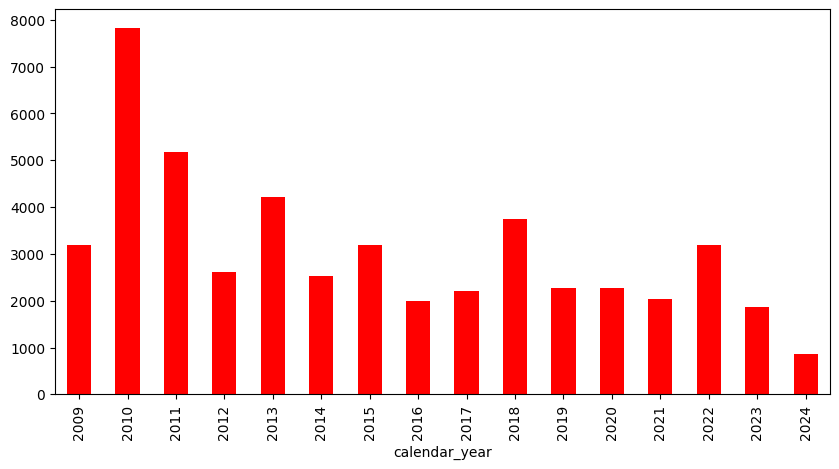

In [17]:
g1.plot(kind='bar', figsize=(10, 5), color='red')

In [18]:
# In each year, how much % of wildfires each year were accidental? 
# In each year, how much % of wildfires each year were deliberate?

accidental = df4[(df4.motive == 'Accidental') & (df4.area == 'Wales') & (df4.fire_type == 'All Fires')]

g2 = accidental.groupby('calendar_year')['number'].sum()
g2

calendar_year
2009     472
2010    1168
2011     860
2012     474
2013     930
2014     643
2015     587
2016     425
2017     502
2018    1056
2019     524
2020     646
2021     483
2022     992
2023     570
2024     231
Name: number, dtype: int64

In [19]:

#g2.plot(kind='bar', stacked = True, figsize=(10, 5), color='blue')

In [20]:
deliberate = df4[(df4.motive == 'Deliberate') & (df4.area == 'Wales') & (df4.fire_type == 'Secondary fires')]
g3 = deliberate.groupby('calendar_year')['number'].sum()
g3

calendar_year
2009    2661
2010    6445
2011    4118
2012    2070
2013    3196
2014    1833
2015    2511
2016    1520
2017    1655
2018    2509
2019    1682
2020    1499
2021    1466
2022    2081
2023    1172
2024     590
Name: number, dtype: int64

In [21]:
merge1 = pd.merge(g1, g2, how='left', on = 'calendar_year') 
merge2 = pd.merge(merge1, g3, how = 'left', on ='calendar_year')

In [22]:
merge2

,number_x,number_y,number
calendar_year,,,
2009,3190,472,2661
2010,7833,1168,6445
2011,5170,860,4118
2012,2609,474,2070
2013,4218,930,3196
2014,2525,643,1833
2015,3182,587,2511
2016,1999,425,1520
2017,2210,502,1655


In [23]:
merge2.columns = ['total', 'accidental', 'deliberate']
merge2.to_csv("/Users/c23093869/Desktop/humanactivity.csv", index=False)

<Axes: xlabel='calendar_year'>

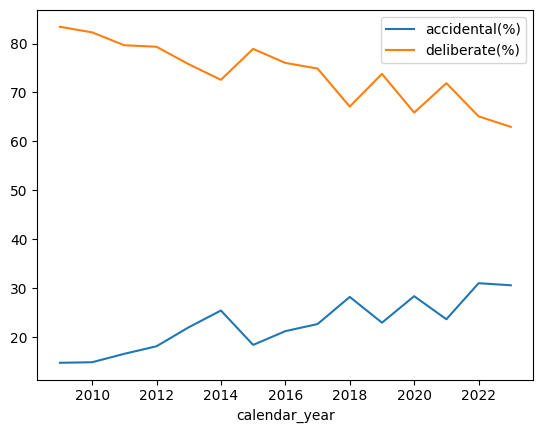

In [24]:
merge2['accidental(%)'] = ((merge2['accidental']/merge2['total'])*100).round(2)
merge2['deliberate(%)'] = ((merge2['deliberate']/merge2['total'])*100).round(2)
#merge2.plot(kind='bar', figsize=(10, 5))
#merge2
#minus2024merge = merge2[merge2['calendar_year'] != 2024]
minus2024merge = merge2[merge2.index != 2024]

merge2['deliberate(%)'].mean()

#Each year an average of 77% of fires attended by FRS were caused deliberately. 
# Accidental fires are slowly increasing
minus2024merge[['accidental(%)', 'deliberate(%)']].plot()

In [26]:
bymonth = df4[
    (df4.area == "Wales") &
    (df4.fire_type == 'All Fires') &
    (df4.motive == 'All motives')
].copy()

month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

bymonth['month'] = bymonth['month'].str.strip().str.capitalize()
bymonth['month'] = pd.Categorical(bymonth['month'], categories=month_order, ordered=True)

grouped = bymonth.groupby(['month', 'calendar_year'])['number'].sum().reset_index()
pivot_table = grouped.pivot(index='month', columns='calendar_year', values='number')
pivot_table = pivot_table.reindex(month_order)  # ensure full order

pivot_table.reset_index().to_csv('wales_firespermonth.csv', index=False)


/var/folders/qk/lypwps4s7jq5qyftyxvlznt00000gp/T/ipykernel_24253/2311598057.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = bymonth.groupby(['month', 'calendar_year'])['number'].sum().reset_index()


<Axes: xlabel='month'>

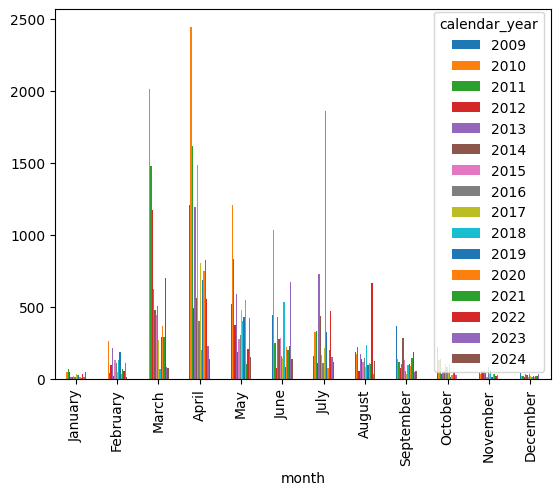

In [27]:
pivot_table.plot(kind = "bar")

In [28]:
# How many wildfires are outside the burn season? 
# Burn Season - Uplands - oct 1 to March 31, Elsewhere - nov 1 to March 15

df4

#accidental and deliberate burns outside of burn season
outburns = df4[df4['month'].isin(['April','May','June', 'July', 'August', 'September'])]
outburns2 = outburns[(outburns['area'] == 'Wales') & (outburns['fire_type'] == 'Secondary fires') & (outburns['motive'] == 'Deliberate')]
outburns3 = outburns2.groupby('calendar_year')['number'].sum()
outburns4 = outburns[(outburns['area'] == 'Wales') & (outburns['fire_type'] == 'Secondary fires') & (outburns['motive'] == 'Accidental')]
outburns5 = outburns4.groupby('calendar_year')['number'].sum()

outburnsmerge = pd.merge(outburns3, outburns5, how='left', on = 'calendar_year')
outburnsmerge.columns = ['deliberate_outburns', 'accidental_outburns']

#total (all motives) burns outside of burn season
total_outs = outburns[(outburns['area'] == 'Wales') & (outburns['fire_type'] == 'Secondary fires') & (outburns['motive'] == 'All motives')]
total_outs1 = total_outs.groupby('calendar_year')['number'].sum()
total_outsmerge = pd.merge(total_outs1, g1, how='left', on = 'calendar_year')
total_outsmerge['out(%)'] = ((total_outsmerge['number_x']/total_outsmerge['number_y'])*100).round(2)

#combining both
# NOTE!! total_burns includes all the months. outburns are fires outside the burn season.
#out(%) is from total_burns while delib and accid are from allmotives

outburns_bigmerge = pd.merge (outburnsmerge, total_outsmerge, how='left', on = 'calendar_year')
outburns_bigmerge.columns = ['deliberate_outburns', 'accidental_outburns', 'allmotives_outburns', 'total_burns', 'out(%)']
outburns_bigmerge['delib(%)'] = ((outburns_bigmerge['deliberate_outburns']/outburns_bigmerge['allmotives_outburns'])*100).round(2)
outburns_bigmerge['accid(%)'] = ((outburns_bigmerge['accidental_outburns']/outburns_bigmerge['allmotives_outburns'])*100).round(2)
outburns_bigmerge

#outburns_bigmerge['delib(%)'].mean()

,deliberate_outburns,accidental_outburns,allmotives_outburns,total_burns,out(%),delib(%),accid(%)
calendar_year,,,,,,,
2009,2406,413,2819,3190,88.37,85.35,14.65
2010,4376,710,5086,7833,64.93,86.04,13.96
2011,2649,521,3170,5170,61.32,83.56,16.44
2012,967,178,1145,2609,43.89,84.45,15.55
2013,2415,707,3122,4218,74.02,77.35,22.65
2014,1342,477,1819,2525,72.04,73.78,26.22
2015,1954,404,2358,3182,74.10,82.87,17.13
2016,911,207,1118,1999,55.93,81.48,18.52
2017,1344,360,1704,2210,77.10,78.87,21.13


In [29]:
# How many wildfires were within the burn season?

inburns = df4[df4['month'].isin(['October','November','December', 'January', 'February', 'March'])]
inburns1 = inburns[(inburns['area'] == 'Wales') & (inburns['fire_type'] == 'Secondary fires') & (inburns['motive'] == 'All motives')]
inburns2 = inburns1.groupby('calendar_year')['number'].sum()
total_inburns = pd.merge(inburns2, g1, how='left', on = 'calendar_year')
total_inburns['in(%)'] =  ((total_inburns['number_x']/total_inburns['number_y'])*100).round(2)
#total_inburns['in(%)'].plot(kind = 'bar')
total_inburns.columns = ['burn within the burn season','total burns all year','in(%)']
total_inburns

,burn within the burn season,total burns all year,in(%)
calendar_year,,,
2009,299,3190,9.37
2010,2471,7833,31.55
2011,1757,5170,33.98
2012,1370,2609,52.51
2013,959,4218,22.74
2014,630,2525,24.95
2015,709,3182,22.28
2016,805,1999,40.27
2017,430,2210,19.46


area
Mid and West Wales    14896.00
North Wales            6754.00
South Wales           25267.00
total fires           46917.00
percent midwest          31.75
percent south            53.85
percent north            14.40
Name: number, dtype: float64

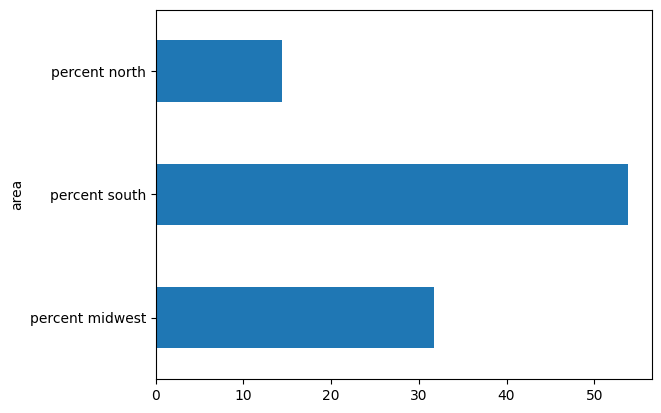

In [30]:
# Which part of Wales saw the most wildfires each year?

area_wal = df4[(df4['fire_type'] == 'Secondary fires') & (df4['motive'] == 'All motives')]
area_wal1 = area_wal.groupby('area')['number'].sum()
area_wal2 = area_wal1[area_wal1.index != 'Wales']

area_wal2['total fires'] = 46917
area_wal2['percent midwest'] = ((area_wal2['Mid and West Wales']/area_wal2['total fires'])*100).round(2)
area_wal2['percent south'] = ((area_wal2['South Wales']/area_wal2['total fires'])*100).round(2)
area_wal2['percent north'] = ((area_wal2['North Wales']/area_wal2['total fires'])*100).round(2)
area_wal2[['percent midwest','percent south','percent north']].plot(kind='barh')
area_wal2

#More than half of all wildfires in Wales were in south Wales. 


In [31]:
license_years = df4[df4['calendar_year'].isin(['2020','2021','2022', '2023', '2024'])]
license = license_years[(license_years['fire_type'] == 'Secondary fires') & (license_years['motive'] == 'Deliberate')]
license1 = license.groupby('month')['number'].sum()

In [32]:
# Fires by cause and location

causes = pd.read_csv("/Users/c23093869/Desktop/Data/CSAF0061.csv",  encoding = 'ISO-8859-1', low_memory=False)

cleaned_causes = causes[['Data_DEC', 'Area_ItemName_ENG_STR', 'Year_Code_STR', 'Cause_ItemName_ENG_STR', 'Location_ItemName_ENG_STR', 'Source_ItemName_ENG_STR']]

In [33]:


cleaned_causes.columns = ['number', 'area', 'year_code', 'cause', 'location', 'source']

cleaned_causes

,number,area,year_code,cause,location,source
0,0.0,South Wales,2018-19,Faulty fuel supply,Road vehicles,Grill/toaster
1,0.0,North Wales,2018-19,Faulty fuel supply,Road vehicles,Microwave oven
2,0.0,South Wales,2018-19,Faulty fuel supply,All locations of accidental primary fires,Grill/toaster
3,0.0,North Wales,2018-19,Faulty fuel supply,All locations of accidental primary fires,Candles
4,0.0,Wales,2018-19,Faulty fuel supply,All locations of accidental primary fires,Candles
...,...,...,...,...,...,...
285025,0.0,North Wales,2023-24,All causes of accidental primary fires,Dwellings,Bombs and explosives
285026,3.0,Mid and West Wales,2023-24,All causes of accidental primary fires,All locations of accidental primary fires,Battery charger
285027,5.0,Wales,2023-24,All causes of accidental primary fires,All locations of accidental primary fires,Washer/dryer combined
285028,0.0,South Wales,2023-24,All causes of accidental primary fires,Dwellings,Heating equipment - Food warming (not cooking)


In [34]:
cc2024 = cleaned_causes[(cleaned_causes.area ==  "Wales") & (cleaned_causes.year_code == '2023-24') & (cleaned_causes.location == 'Other')]

In [35]:
filter_cc2024 = cc2024[
    (cc2024['cause'] != 'All causes of accidental primary fires') &
    (cc2024['source'] != 'All sources of accidental primary fires') 
]

In [36]:
filter_cc2024.sort_values(by = 'number', ascending = False)

,number,area,year_code,cause,location,source
204409,44.0,Wales,2023-24,Other,Other,Unknown
204372,40.0,Wales,2023-24,Other,Other,Other sources
4901,15.0,Wales,2023-24,Faulty fuel supply,Other,Electrical distribution
175764,11.0,Wales,2023-24,Placing articles too close to heat,Other,Other sources
147319,9.0,Wales,2023-24,Careless handling,Other,Other sources
...,...,...,...,...,...,...
90246,0.0,Wales,2023-24,Chip pan/deep fat fryer,Other,Vending equipment
90268,0.0,Wales,2023-24,Chip pan/deep fat fryer,Other,Fluorescent lights
90287,0.0,Wales,2023-24,Chip pan/deep fat fryer,Other,Telephone/Answeing machine/Fax
90306,0.0,Wales,2023-24,Chip pan/deep fat fryer,Other,Fairy lights


In [37]:
majorsources = filter_cc2024.groupby(['source'])['number'].sum().sort_values(ascending=False)

<Axes: xlabel='source'>

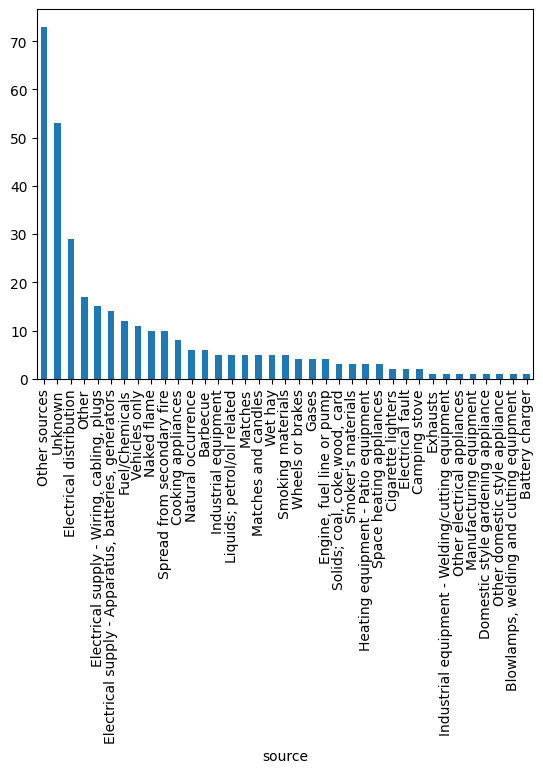

In [38]:
majorsources.head(37).plot(kind='bar')

In [39]:
natural = cleaned_causes[(cleaned_causes.area == 'Wales') & (cleaned_causes.source == 'Natural occurrence') & (cleaned_causes.cause == 'All causes of accidental primary fires') & (cleaned_causes.location == 'All locations of accidental primary fires')]
natural

,number,area,year_code,cause,location,source
261628,26.0,Wales,2015-16,All causes of accidental primary fires,All locations of accidental primary fires,Natural occurrence
263810,33.0,Wales,2019-20,All causes of accidental primary fires,All locations of accidental primary fires,Natural occurrence
264461,18.0,Wales,2012-13,All causes of accidental primary fires,All locations of accidental primary fires,Natural occurrence
268502,43.0,Wales,2018-19,All causes of accidental primary fires,All locations of accidental primary fires,Natural occurrence
269376,36.0,Wales,2013-14,All causes of accidental primary fires,All locations of accidental primary fires,Natural occurrence
270950,21.0,Wales,2009-10,All causes of accidental primary fires,All locations of accidental primary fires,Natural occurrence
271636,28.0,Wales,2023-24,All causes of accidental primary fires,All locations of accidental primary fires,Natural occurrence
272906,28.0,Wales,2016-17,All causes of accidental primary fires,All locations of accidental primary fires,Natural occurrence
273676,25.0,Wales,2021-22,All causes of accidental primary fires,All locations of accidental primary fires,Natural occurrence
273763,30.0,Wales,2022-23,All causes of accidental primary fires,All locations of accidental primary fires,Natural occurrence


In [40]:
natural_pfires = natural.groupby('year_code')['number'].sum()

In [41]:
# Naturally occuring accidental primary fires over the years in Wales

natural_pfires

year_code
2009-10    21.0
2010-11    24.0
2011-12    21.0
2012-13    18.0
2013-14    36.0
2014-15    30.0
2015-16    26.0
2016-17    28.0
2017-18    20.0
2018-19    43.0
2019-20    33.0
2020-21    28.0
2021-22    25.0
2022-23    30.0
2023-24    28.0
Name: number, dtype: float64

In [42]:
# All accidental primary grassland fires 

year_totals = df4[(df4.motive == 'Accidental') & (df4.area == 'Wales') & (df4.fire_type == 'Primary fires')]

In [43]:
year_totals.groupby('year')['number'].sum()

year
2009-10    24
2010-11    57
2011-12    51
2012-13    24
2013-14    42
2014-15    26
2015-16    33
2016-17    23
2017-18    20
2018-19    77
2019-20    31
2020-21    57
2021-22    41
2022-23    74
2023-24    61
2024-25    13
Name: number, dtype: int64

In [44]:
majorcauses = cleaned_causes[(cleaned_causes.area ==  "Wales") & (cleaned_causes['cause'] != 'All causes of accidental primary fires') &
    (cleaned_causes['source'] != 'All sources of accidental primary fires') & (cleaned_causes['location'] != 'All locations of accidental primary fires')]

In [45]:
mj_byyear = majorcauses.groupby(['year_code', 'cause', 'source'])['number'].sum().reset_index()
mj_byyear.head(10)

,year_code,cause,source,number
0,2009-10,Careless handling,Audio equipment,0.0
1,2009-10,Careless handling,Barbecue,2.0
2,2009-10,Careless handling,Battery charger,0.0
3,2009-10,Careless handling,Blow lamp/paint remover,0.0
4,2009-10,Careless handling,"Blowlamps, welding and cutting equipment",0.0
5,2009-10,Careless handling,Bombs and explosives,0.0
6,2009-10,Careless handling,Camping stove,0.0
7,2009-10,Careless handling,Candles,9.0
8,2009-10,Careless handling,Central and water heating appliances,2.0
9,2009-10,Careless handling,Chimney fires,0.0


In [46]:
top10_by_year = (mj_byyear.sort_values(['year_code', 'number'], ascending=[True, False]).groupby('year_code').head(5))


In [47]:
top10_by_year.head(25)

,year_code,cause,source,number
380,2009-10,Misuse of equipment or appliance,Cooking appliances,755.0
528,2009-10,Other,Other sources,433.0
379,2009-10,Misuse of equipment or appliance,Cooker (including oven),421.0
252,2009-10,Faulty fuel supply,Other sources,337.0
269,2009-10,Faulty fuel supply,Vehicles only,303.0
1208,2010-11,Misuse of equipment or appliance,Cooking appliances,709.0
1356,2010-11,Other,Other sources,476.0
1207,2010-11,Misuse of equipment or appliance,Cooker (including oven),359.0
1080,2010-11,Faulty fuel supply,Other sources,324.0
1097,2010-11,Faulty fuel supply,Vehicles only,296.0


In [48]:
top_sources = (
    majorcauses
    .groupby('source')['number']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

print(top_sources)


source
Cooking appliances                            13640.0
Other sources                                 13493.0
Cooker (including oven)                        8168.0
Vehicles only                                  7448.0
Electrical distribution                        6203.0
Other electrical appliances                    4981.0
Electrical supply - Wiring, cabling, plugs     4721.0
Unknown                                        4576.0
Electrical fault                               4411.0
Other domestic style appliance                 3629.0
Name: number, dtype: float64


# Burned Area from 2011 to 2025

In [110]:
# UPLOADING BURNED AREA FROM 2011 TO 2025 from EFFIS to 

# Start date: 01/01/2008  End date: 01/07/2025

burnedarea = pd.read_csv("/Users/c23093869/Desktop/Data/burnedarea_EFFIS.csv", low_memory=False)

burnedarea[burnedarea['admlvl1'] == 'Wales']

,X,Y,id,initialdate,finaldate,area_ha,iso2,iso3,country,admlvl1,...,transitional_vegetation_percent,other_natural_percent,agriculture_percent,artificial_percent,other_percent,natura2k_percent,noneu,updated,area_code,eu_area
60,NaN,NaN,128,4/15/14 0:00,2014/04/15 00:00:00+00,85,UK,GBR,United Kingdom,Wales,...,0.000000,84.523810,1.190476,0.000000,0.0,0.000000,1,57:55.0,EU,EU_non
63,NaN,NaN,9414,4/18/15 0:00,2015/04/18 00:00:00+00,71,UK,GBR,United Kingdom,Wales,...,0.000000,63.380282,0.000000,8.450704,0.0,0.000000,1,57:55.0,EU,EU_non
90,NaN,NaN,11468,4/7/17 0:00,2017/04/09 00:00:00+00,546,UK,GBR,United Kingdom,Wales,...,0.550459,97.431193,0.000000,0.000000,0.0,0.000000,1,57:55.0,EU,EU_non
98,NaN,NaN,14010,2/26/18 0:00,2018/02/26 00:00:00+00,37,UK,GBR,United Kingdom,Wales,...,0.000000,100.000000,0.000000,0.000000,0.0,0.000000,1,15:03.1,EU,EU_non
102,NaN,NaN,14203,7/15/18 0:00,2018/07/15 00:00:00+00,29,UK,GBR,United Kingdom,Wales,...,0.000000,100.000000,0.000000,0.000000,0.0,0.000000,1,15:03.1,EU,EU_non
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2403,NaN,NaN,270237,5/6/25 12:34,2025/05/06 13:25:00+00,13,UK,GBR,United Kingdom,Wales,...,0.000000,100.000000,0.000000,0.000000,0.0,99.981229,1,34:37.0,EU,EU_non
2418,NaN,NaN,263301,3/6/25 11:38,2025/03/07 11:38:00+00,147,UK,GBR,United Kingdom,Wales,...,0.000000,100.000000,0.000000,0.000000,0.0,0.000000,1,53:44.7,EU,EU_non
2419,NaN,NaN,263302,3/6/25 11:38,2025/03/07 11:38:00+00,45,UK,GBR,United Kingdom,Wales,...,0.000000,100.000000,0.000000,0.000000,0.0,0.000000,1,53:44.7,EU,EU_non
2438,NaN,NaN,257413,3/2/25 13:44,2025/03/03 13:44:00+00,92,UK,GBR,United Kingdom,Wales,...,0.000000,100.000000,0.000000,0.000000,0.0,0.000000,1,24:31.6,EU,EU_non


In [111]:
burnedarea['initialdate'].head(20)


0      5/2/11 0:00
1      5/3/11 0:00
2      5/1/11 0:00
3      5/2/11 0:00
4      5/1/11 0:00
5      5/2/11 0:00
6     4/22/11 0:00
7      5/1/11 0:00
8      5/3/11 0:00
9     4/30/11 0:00
10    4/30/11 0:00
11     5/1/11 0:00
12     5/1/11 0:00
13     5/1/11 0:00
14     5/1/11 0:00
15     5/1/11 0:00
16     5/1/11 0:00
17    4/30/11 0:00
18    4/27/11 0:00
19    4/29/11 0:00
Name: initialdate, dtype: object

In [112]:
#identify errors in parsing date
burnedarea['initialdate'] = pd.to_datetime(burnedarea['initialdate'], errors='coerce')

burnedarea['year'] = burnedarea['initialdate'].dt.year
burnedarea['initialdate'] = pd.to_datetime(burnedarea['initialdate'], errors='coerce')

#just in case
df_uk = burnedarea[burnedarea['country'] == 'United Kingdom'].copy()
df_uk = df_uk[(df_uk['year'] >= 2015) & (df_uk['year'] <= 2025)]

print("Total rows:", len(burnedarea))
print("Failed to parse:", burnedarea['initialdate'].isna().sum())


Total rows: 2454
Failed to parse: 231


/var/folders/qk/lypwps4s7jq5qyftyxvlznt00000gp/T/ipykernel_24253/503717026.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  burnedarea['initialdate'] = pd.to_datetime(burnedarea['initialdate'], errors='coerce')


In [116]:
burnedarea['initialdate_raw'] = burnedarea['initialdate']

#fix parsing
burnedarea['initialdate'] = pd.to_datetime(
    burnedarea['initialdate_raw'], 
    errors='coerce'
)
burnedarea = burnedarea.dropna(subset=['initialdate'])
burnedarea['year'] = burnedarea['initialdate'].dt.year

# group by fire_id to remove duplicates
fires_agg = burnedarea.groupby('id', as_index=False).agg({
    'country': 'first',
    'admlvl1': 'first',  # region
    'year': 'first',
    'area_ha': 'sum'
})

# set year range and country
df_uk = fires_agg[(fires_agg['country'] == 'United Kingdom') &
                  (fires_agg['year'] >= 2015) &
                  (fires_agg['year'] <= 2025)]

# only count burned area greater than or equal to 30 ha
df_uk_filtered = df_uk[df_uk['area_ha'] >= 30]

# group by region and year
region_yearly = df_uk_filtered.groupby(['admlvl1', 'year'])['area_ha'].sum().reset_index()

# pivot for chart
region_yearly_pivot = region_yearly.pivot(index='year', columns='admlvl1', values='area_ha').fillna(0)
region_yearly_pivot = region_yearly_pivot.sort_index()

# calculate total
uk_total = region_yearly_pivot.sum(axis=1)

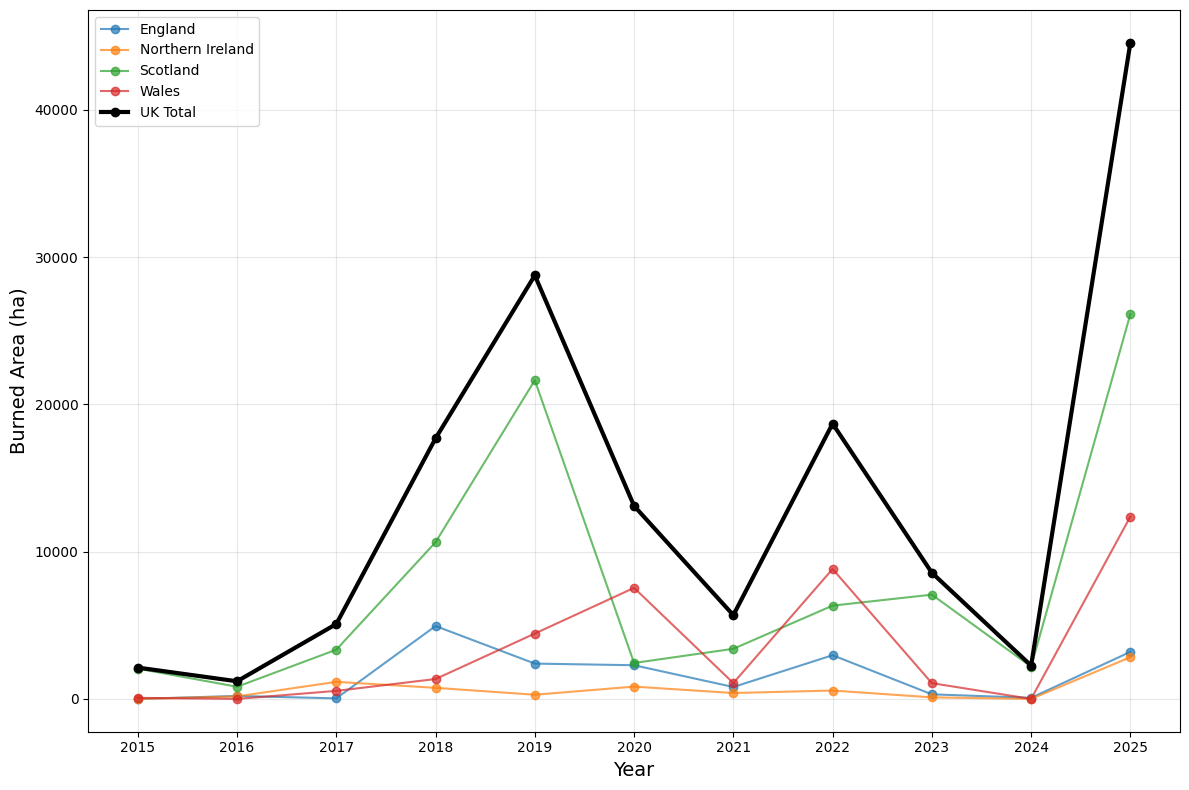

In [114]:
# plot
plt.figure(figsize=(12, 8))

for region in region_yearly_pivot.columns:
    plt.plot(region_yearly_pivot.index, region_yearly_pivot[region],
             marker='o', label=region, linewidth=1.5, alpha=0.7)
plt.plot(uk_total.index, uk_total.values, marker='o', color='black',
         linewidth=3, label='UK Total')

plt.xlabel('Year', fontsize=14)
plt.ylabel('Burned Area (ha)', fontsize=14)
plt.legend( fontsize=10, title_fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(region_yearly_pivot.index)
plt.tight_layout()

plt.show()

# save to csv
region_yearly_pivot.to_csv("totalareaburnt_clean.csv", index=False)


# Rainfall Data

In [94]:
# below shows how the anomalies were calculated

In [104]:
# define baseline according to WMO climate normal
BASELINE = (1991, 2020)

# raw data is in wide format. converting this to long
def reshape_wide_to_long(path, kind="temp", sep=","):
    df = pd.read_csv(path, sep=sep)
    months = ["jan","feb","mar","apr","may","jun",
              "jul","aug","sep","oct","nov","dec"]
    df_m = df[["year"]+months].copy()
    df_long = df_m.melt(id_vars="year", var_name="month_str", value_name="value")
    month_map = {m:i+1 for i,m in enumerate(months)}
    df_long["month"] = df_long["month_str"].str.lower().map(month_map)
    df_long["date"] = pd.to_datetime(df_long["year"].astype(str)+"-"+df_long["month"].astype(str).str.zfill(2))
    df_long = df_long[["date","value"]].sort_values("date").reset_index(drop=True)
    df_long["year"] = df_long["date"].dt.year
    df_long["month"] = df_long["date"].dt.month
    df_long.attrs["kind"] = kind
    return df_long

rain = reshape_wide_to_long("/Users/c23093869/Library/CloudStorage/OneDrive-CardiffUniversity/DISSERTATION/Data/rainfalltotals.csv", kind="rain")
temp = reshape_wide_to_long("/Users/c23093869/Library/CloudStorage/OneDrive-CardiffUniversity/DISSERTATION/Data/meantemps.csv", kind="temp")
rain.head(), temp.head()


(        date  value  year  month
 0 1836-01-01  120.7  1836      1
 1 1836-02-01   76.5  1836      2
 2 1836-03-01  181.1  1836      3
 3 1836-04-01   94.1  1836      4
 4 1836-05-01    6.8  1836      5,
         date  value  year  month
 0 1884-01-01    5.8  1884      1
 1 1884-02-01    4.3  1884      2
 2 1884-03-01    5.1  1884      3
 3 1884-04-01    6.0  1884      4
 4 1884-05-01    9.7  1884      5)

In [105]:
def climatology(df, baseline):
    y0, y1 = baseline
    base = df[(df["year"]>=y0) & (df["year"]<=y1)]
    clim = base.groupby("month")["value"].mean().rename("clim")
    return clim

rain_clim = climatology(rain, BASELINE)
temp_clim = climatology(temp, BASELINE)

def with_anomalies(df, clim):
    out = df.copy()
    out = out.join(clim, on="month")
    out["anom"] = out["value"] - out["clim"]
    out["pct_of_avg"] = out["value"] / out["clim"] * 100.0
    return out

rainA = with_anomalies(rain, rain_clim)
tempA = with_anomalies(temp, temp_clim)
rainA.head(), tempA.head()


(        date  value  year  month        clim       anom  pct_of_avg
 0 1836-01-01  120.7  1836      1  155.153333 -34.453333   77.794010
 1 1836-02-01   76.5  1836      2  120.413333 -43.913333   63.531170
 2 1836-03-01  181.1  1836      3  103.493333  77.606667  174.987117
 3 1836-04-01   94.1  1836      4   88.000000   6.100000  106.931818
 4 1836-05-01    6.8  1836      5   87.090000 -80.290000    7.808015,
         date  value  year  month       clim      anom  pct_of_avg
 0 1884-01-01    5.8  1884      1   4.403333  1.396667  131.718395
 1 1884-02-01    4.3  1884      2   4.473333 -0.173333   96.125186
 2 1884-03-01    5.1  1884      3   5.940000 -0.840000   85.858586
 3 1884-04-01    6.0  1884      4   8.096667 -2.096667   74.104570
 4 1884-05-01    9.7  1884      5  10.876667 -1.176667   89.181735)

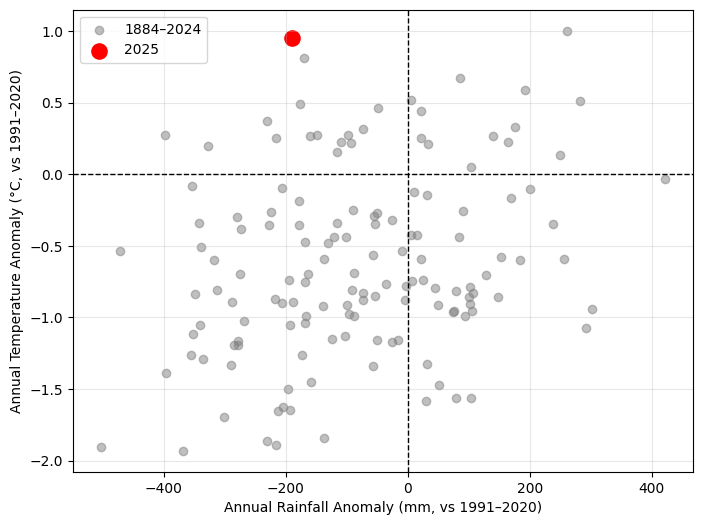

In [109]:
# yearly anomalies scatterplot (rain vs temp)

# group annual anomalies
annual_rain = rainA.groupby("year")["anom"].sum().reset_index(name="rain_anom_mm")
annual_temp = tempA.groupby("year")["anom"].mean().reset_index(name="temp_anom_C")

annual = pd.merge(annual_rain, annual_temp, on="year")

plt.figure(figsize=(8,6))
plt.scatter(annual["rain_anom_mm"], annual["temp_anom_C"], 
            color="grey", alpha=0.5, label="1884–2024")

# highlight 2025
plt.scatter(
    annual.loc[annual["year"]==2025,"rain_anom_mm"], 
    annual.loc[annual["year"]==2025,"temp_anom_C"], 
    color="red", s=120, label="2025"
)

plt.axvline(0, color="black", linestyle="--", lw=1)
plt.axhline(0, color="black", linestyle="--", lw=1)

plt.xlabel("Annual Rainfall Anomaly (mm, vs 1991–2020)")
plt.ylabel("Annual Temperature Anomaly (°C, vs 1991–2020)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [100]:
# save to csv 
annual.to_csv("wales_annual_rain_temp_anomalies.csv", index=False)
annual.head()


,year,rain_anom_mm,temp_anom_C
0,1884,-164.303333,-0.698333
1,1885,-137.803333,-1.840000
2,1886,78.696667,-1.565000
3,1887,-502.703333,-1.906667
4,1888,-216.303333,-1.890000
